In [1]:
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255
y_train,y_test = y_train.flatten(),y_test.flatten()
num_class = len(set(y_train))

In [4]:
i = tf.keras.Input(shape=(x_train[0].shape))
x = tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu')(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(.2)(x)
x = tf.keras.layers.Dense(num_class,activation ='softmax')(x)

model = tf.keras.models.Model(i,x)

In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [6]:
r = model.fit(x_train,y_train, 
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5251 - accuracy: 0.4470 - val_loss: 1.2396 - val_accuracy: 0.5560
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1853 - accuracy: 0.5762 - val_loss: 1.0772 - val_accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 27s 18ms/step - loss: 1.0282 - accuracy: 0.6363 - val_loss: 1.0027 - val_accuracy: 0.6390
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9085 - accuracy: 0.6794 - val_loss: 0.9551 - val_accuracy: 0.6695
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8141 - accuracy: 0.7099 - val_loss: 0.8798 - val_accuracy: 0.6898
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7329 - accuracy: 0.7394 - val_loss: 0.8681 - val_accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6643 - accuracy: 0.7630 - val_loss: 0.8588 -

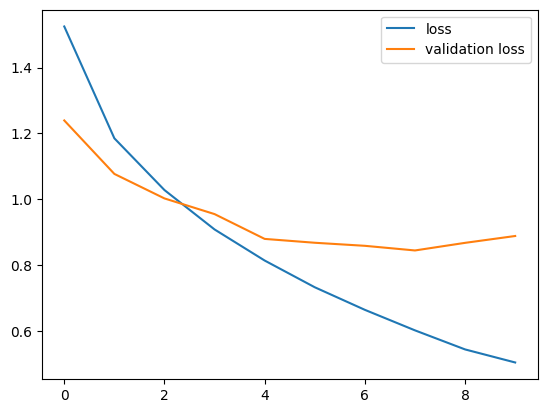

In [7]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

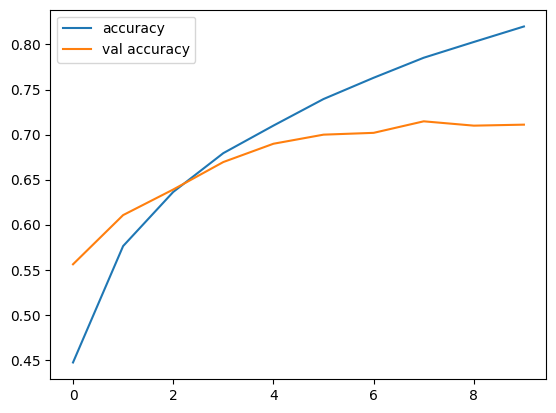

In [8]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()

In [9]:
y_predicted = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


### Plotting confusion matrix

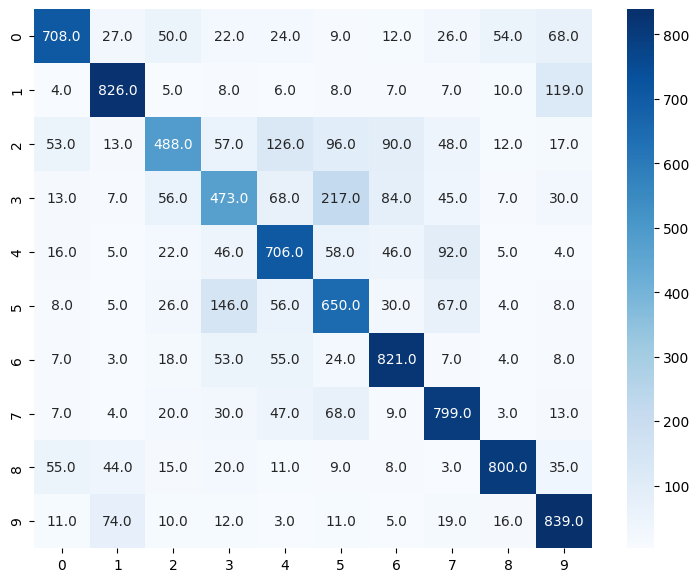

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(9,7))
plt.xlabel('predicted')
plt.ylabel('true')
cm2= sns.heatmap(cm, annot=True,
            cmap='Blues', fmt='.1f')
plt.ioff()
plt.show()

In [11]:
misclassified_idx = np.where(y_predicted!=y_test)
len(misclassified_idx[0])

2890

In [12]:
labels = """
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split()

In [13]:
choice = np.random.choice(misclassified_idx[0])
choice

91

In [14]:
print(f"true vlue is {labels[y_test[choice]]} \n predicted vaue is {labels[y_predicted[choice]]}")
plt.imshow(x_test[choice],cmap='gray');


true vlue is cat 
 predicted vaue is deer


In [15]:
model.save('cnn_epoch10.h5')

In [16]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
def top_n_accuracy(n):
    preds = model.predict(x_test)
    correct_predictions = 0
    for i in range(len(preds)):
        top_n_predictions = np.squeeze(np.argsort(preds[i]))[::-1][:n]
        if y_test[i] in top_n_predictions:
            correct_predictions +=1
    return (correct_predictions/len(y_test))*100

In [18]:
#top 5 accuracy
print(top_n_accuracy(5))

313/313 [==============================] - 2s 5ms/step
97.69


In [19]:
#top 1 accuracy
print(top_n_accuracy(1))

313/313 [==============================] - 2s 6ms/step
71.1
